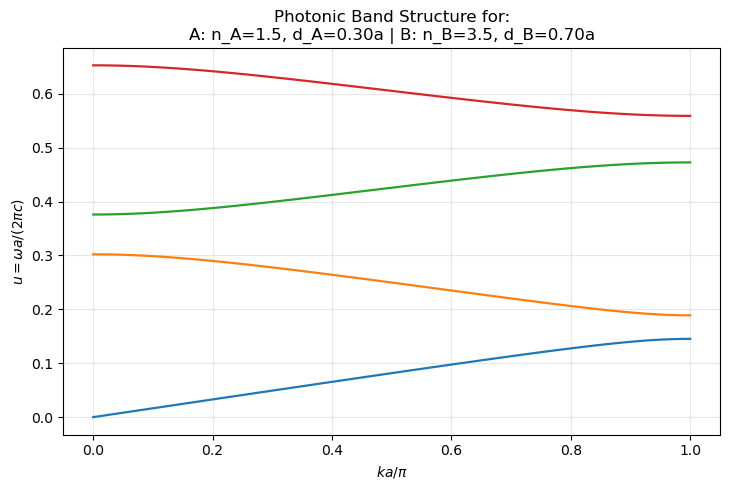

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

a    = 1.0
dA   = 0.30 * a
dB   = 0.70 * a
nA, nB = 1.5, 3.5
epsA, epsB = nA**2, nB**2

N  = 600
y  = np.linspace(0.0, a, N, endpoint=False)
dy = a / N
eps = np.where(y < dA, epsA, epsB).astype(float)
ainv = 1.0 / eps

nbands  = 4
Nk      = 121
k_grid  = np.linspace(0.0, np.pi/a, Nk)
ka_grid = k_grid * a

def harmmean(x, y):
    return 2.0 * x * y / (x + y + 1e-300)

def Matrix(N, dy, k, a, ainv):
    
    A = np.zeros((N, N), dtype=complex)

    a_half = harmmean(ainv[:-1], ainv[1:])   
    a_edge = harmmean(ainv[-1], ainv[0])     

    for i in range(N):
        ip = (i + 1) % N
        im = (i - 1) % N

        if i <= N-2:
            a_ip = a_half[i]
        else:
            a_ip = a_edge                     
        if i >= 1:
            a_im = a_half[i-1]
        else:
            a_im = a_edge                    


        phase_ip = 1.0 if i <= N-2 else np.exp(+1j * k * a)   
        phase_im = 1.0 if i >= 1    else np.exp(-1j * k * a)   

        
        A[i, i] += (a_ip + a_im) / (dy**2)

        
        A[i, ip] += -(a_ip / (dy**2)) * phase_ip
        A[i, im] += -(a_im / (dy**2)) * phase_im

    return A


def solve_bands(ainv, N, dy, a, k_grid, nbands):
    bands = np.full((len(k_grid), nbands), np.nan, dtype=float)
    for idx, k in enumerate(k_grid):
        A = Matrix(N, dy, k, a, ainv)
        w = la.eigvalsh(A)                  
        w.sort()
        take = min(nbands, len(w))
        u = (a / (2.0*np.pi)) * np.sqrt(w[:take])
        bands[idx, :take] = u
    return bands

bands = solve_bands(ainv, N, dy, a, k_grid, nbands)

plt.figure(figsize=(7.4, 5.0))
for b in range(nbands):
    plt.plot(ka_grid/np.pi, bands[:, b], lw=1.6)
plt.xlabel(r"$k a / \pi$ ")
plt.ylabel(r"$u = \omega a / (2\pi c)$")
plt.title("Photonic Band Structure for:\n"
          f"A: n_A={nA}, d_A={dA/a:.2f}a | B: n_B={nB}, d_B={dB/a:.2f}a")
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('band_structure.png', dpi=300)
plt.show()
